In [1]:
import pymmcore

In [2]:
mmc = pymmcore.CMMCore()

In [3]:
mmc.getVersionInfo()

'MMCore version 11.2.1'

In [4]:
mmc.getAPIVersionInfo()

'Device API version 71, Module API version 10'

In [1]:
import pymmcore_plus

In [2]:
mmc_2 = pymmcore_plus.CMMCorePlus.instance()

In [3]:
mmc_2.getVersionInfo()

'MMCore version 11.2.1'

In [4]:
mmc_2.getAPIVersionInfo()

'Device API version 71, Module API version 10'

In [5]:
mmc_2.loadSystemConfiguration()

In [7]:
mmc_2.getLoadedDevices()

('DHub',
 'Camera',
 'Dichroic',
 'Emission',
 'Excitation',
 'Objective',
 'Z',
 'Path',
 'XY',
 'White Light Shutter',
 'Autofocus',
 'LED',
 'LED Shutter',
 'Core')

In [8]:
mmc_2.snapImage()

In [9]:
image = mmc_2.getImage()

In [10]:
image

array([[3276, 3339, 3402, ..., 3087, 3150, 3213],
       [3284, 3347, 3410, ..., 3095, 3158, 3221],
       [3292, 3355, 3418, ..., 3103, 3166, 3229],
       ...,
       [5846, 5846, 5844, ..., 5837, 5842, 5845],
       [5846, 5846, 5844, ..., 5838, 5842, 5845],
       [5846, 5846, 5843, ..., 5839, 5843, 5845]], dtype=uint16)

In [12]:
mmc_2.getImageHeight()

512

In [16]:
mmc_2.setXYPosition(1000000,1000000)

In [17]:
mmc_2.snapImage()

In [18]:
mmc_2.getImage()

array([[5846, 5845, 5843, ..., 5839, 5843, 5845],
       [5846, 5845, 5843, ..., 5840, 5843, 5846],
       [5846, 5845, 5842, ..., 5840, 5844, 5846],
       ...,
       [3300, 3237, 3174, ..., 3489, 3426, 3363],
       [3292, 3229, 3166, ..., 3481, 3418, 3355],
       [3284, 3221, 3158, ..., 3473, 3410, 3347]], dtype=uint16)

In [19]:
import matplotlib.pyplot as plt

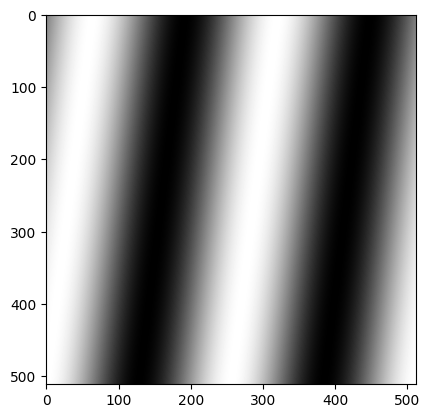

In [22]:
plt.imshow(image, cmap="gray")

plt.show()

In [24]:
mmc_2.setProperty('Camera', 'PixelType', '32bitRGB')  # Change pixel type

rgb32 = mmc_2.getImage()



In [25]:
rgb32

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

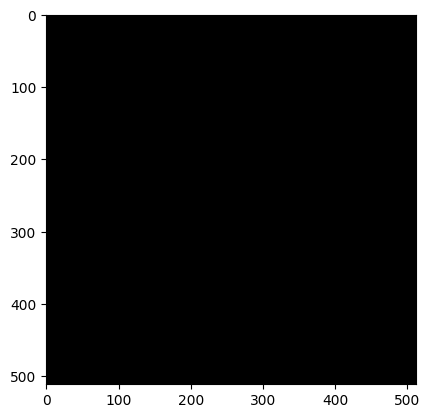

In [26]:
plt.imshow(rgb32)

plt.show()

In [27]:
signals = pymmcore_plus.CMMCoreSignaler()

In [37]:
mmc_2.snapImage()

print(signals.imageSnapped)

<SignalInstance 'imageSnapped' on <pymmcore_plus.core.events._psygnal.CMMCoreSignaler object at 0x000002C3F8827430>>


In [32]:
print(signals.sequenceAcquisitionStarted())

None


In [44]:
from pymmcore_plus import CMMCorePlus

core = CMMCorePlus()

def is_snapped():
    print('The image has been snapped')


mmc_2.events.imageSnapped.connect(is_snapped)

<function __main__.is_snapped()>

In [45]:
mmc_2.snapImage()

mmc_2.getImage()

The image has been snapped


array([[[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [12, 12, 12]],

       [[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [12, 12, 12]],

       [[12, 12, 12],
        [12, 12, 12],
        [11, 12, 12],
        ...,
        [13, 13, 13],
        [12, 13, 13],
        [12, 12, 12]],

       ...,

       [[13, 12,  2],
        [12, 12,  2],
        [12, 13,  2],
        ...,
        [13, 11,  2],
        [13, 12,  2],
        [13, 12,  2]],

       [[12, 12,  2],
        [12, 12,  2],
        [12, 13,  2],
        ...,
        [13, 11,  2],
        [13, 12,  2],
        [13, 12,  2]],

       [[12, 12,  2],
        [12, 12,  2],
        [12, 13,  2],
        ...,
        [13, 11,  2],
        [13, 12,  2],
        [13, 12,  2]]], dtype=uint8)

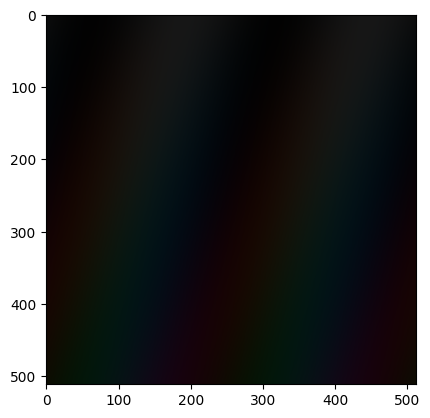

In [47]:
new_image = mmc_2.getImage()


plt.imshow(new_image, cmap='gray')

plt.show()

In [49]:
import napari

v = napari.Viewer()

v.add_image(mmc_2.getImage())




<Image layer 'Image' at 0x2c38a4158b0>